In [20]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [3]:
with open('df_to_model_1_3751.pickle', 'rb') as f:
    project_df = pickle.load(f)

In [4]:
project_df.head()

,kickstarter_page,description_length,n_pledges,pledge_level_min,pledge_level_max,pledge_level_stddev,funding_actual,funding_goal,n_backers,start_date,...,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Sculpture,Technology,Theater
0,/projects/1063028485/good-art-guide/,93,1,7.886086,7.886086,0.000000,0.0,15772.172704,0,2014-11-26,...,0,0,0,0,0,0,0,0,0,0
1,/projects/spiderwebcitytx/katlynn-maries-horro...,106,3,2.000000,100.000000,45.507020,17.0,15000.000000,3,2014-11-24,...,0,0,0,0,0,0,0,0,0,0
2,/projects/mnassar/wwwparkinglocatorcomau/,46,1,8.712913,8.712913,0.000000,0.0,43564.564775,0,2014-11-21,...,0,0,0,0,0,0,0,0,1,0
3,/projects/1934089488/not-enough-fish/,160,7,7.837804,783.780404,299.100883,0.0,1567.560808,0,2014-11-19,...,1,0,0,0,0,0,0,0,0,0
4,/projects/timodwyer/hurt-fate-feature-film/,153,10,1.564151,7820.753536,2342.290924,0.0,93849.042433,0,2014-11-17,...,1,0,0,0,0,0,0,0,0,0


In [5]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55808 entries, 0 to 1
Data columns (total 26 columns):
kickstarter_page       55808 non-null object
description_length     55808 non-null int64
n_pledges              55808 non-null int64
pledge_level_min       55808 non-null float64
pledge_level_max       55808 non-null float64
pledge_level_stddev    55808 non-null float64
funding_actual         55808 non-null float64
funding_goal           55808 non-null float64
n_backers              55808 non-null object
start_date             55808 non-null object
duration               55808 non-null int64
Comics                 55808 non-null uint8
Crafts                 55808 non-null uint8
Dance                  55808 non-null uint8
Design                 55808 non-null uint8
Fashion                55808 non-null uint8
Film & Video           55808 non-null uint8
Food                   55808 non-null uint8
Games                  55808 non-null uint8
Journalism             55808 non-null uint8
Mu

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
subset_df = project_df.drop(columns=['kickstarter_page', 'start_date'])

In [8]:
col_types = {'n_backers': int}
subset_df = subset_df.astype(col_types)

In [9]:
subset_df['funding_percent'] = subset_df.funding_actual / subset_df.funding_goal
#subset_df['pledge_min_percent'] = subset_df.pledge_level_min / subset_df.funding_goal
subset_df.drop(columns=['funding_actual'], inplace=True)
subset_df.head()

,description_length,n_pledges,pledge_level_min,pledge_level_max,pledge_level_stddev,funding_goal,n_backers,duration,Comics,Crafts,...,Food,Games,Journalism,Music,Photography,Publishing,Sculpture,Technology,Theater,funding_percent
0,93,1,7.886086,7.886086,0.000000,15772.172704,0,60,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,106,3,2.000000,100.000000,45.507020,15000.000000,3,60,0,0,...,0,0,0,0,0,0,0,0,0,0.001133
2,46,1,8.712913,8.712913,0.000000,43564.564775,0,60,0,0,...,0,0,0,0,0,0,0,1,0,0.000000
3,160,7,7.837804,783.780404,299.100883,1567.560808,0,59,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,153,10,1.564151,7820.753536,2342.290924,93849.042433,0,60,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [10]:
X = subset_df.drop(columns=['funding_percent'])
y = subset_df.funding_percent

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.head()

,description_length,n_pledges,pledge_level_min,pledge_level_max,pledge_level_stddev,funding_goal,n_backers,duration,Comics,Crafts,...,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Sculpture,Technology,Theater
11,3218,20,5.000000,2000.000000,478.459661,50000.000000,1712,35,0,0,...,0,0,1,0,0,0,0,0,0,0
11,340,5,5.000000,2200.000000,843.625509,17925.000000,6,19,0,0,...,0,0,0,0,0,0,0,0,0,0
6,836,7,8.550386,1710.077127,570.664304,6840.308509,440,30,0,0,...,0,0,0,0,0,0,0,0,1,0
8,22,4,0.930735,9.307353,3.290646,18.614707,0,26,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,1,1.863231,1.863231,0.000000,93161.573249,0,30,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)
y_predicted = base_model.predict(X_test)

In [15]:
def mean_squared_error(true, pred):
    return np.mean((pred - true)**2)

def root_mean_square_error(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

def mean_absolute_error(true,pred):
    return np.mean(np.abs(pred - true))

def r2_score(true,pred):
    y_bar = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar)**2)
    return 1.-(SSE/SST)

def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

def standard_error_estimate(true,pred,num_data):
    SSE = np.sum((pred - true)**2)
    return np.sqrt(SSE/(num_data-2))

def plot_model_results(X,y,ypred):
    plt.style.use('seaborn')
    plt.scatter(ypred,y,s=55)
    plt.plot([min(y),max(y)],[min(y),max(y)],'r-')
    plt.xlabel('Predicted')
    plt.ylabel('True');

def model_score(true, pred, X, verbose=0):
    r2 = r2_score(true,pred)
    adjr2 = adj_r2(r2,X.shape[0],X.shape[1])
    if verbose:
        plot_model_results(X,true,pred)
        print("Mean Squared Error: ", mean_squared_error(true,pred))
        print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
        print("Mean Absolute Error: ",mean_absolute_error(true,pred))
        print("R2: ", r2)
        print("Adj R2: ", adjr2)
        print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
    return r2, adjr2

In [16]:
model_score(y_test, y_predicted, X_test)

(0.0007211935459666696, -0.00065349468589182)

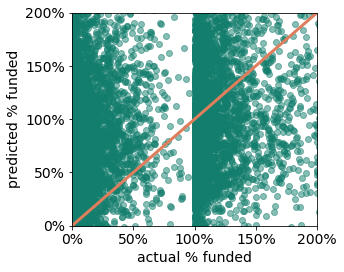

In [30]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(y_test,y_predicted, alpha=0.5, c='xkcd:Blue Green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'xkcd:Dark Peach', linewidth=3)
plt.xlim((0,2))
plt.ylim((0,2))
plt.xlabel('actual % funded')
plt.ylabel('predicted % funded')
ax.set_xticklabels(['0%','50%','100%','150%','200%'])
ax.set_yticklabels(['0%','50%','100%','150%','200%'])
plt.tight_layout()
fig.savefig('all_categories_basic_linreg.png')

(array([3.0507e+04, 3.5470e+03, 1.6370e+03, 7.9800e+02, 3.1200e+02,
        1.1600e+02, 9.5010e+03, 2.7660e+03, 1.3510e+03, 8.8700e+02,
        6.1400e+02, 4.0300e+02, 4.3000e+02, 2.9300e+02, 2.1900e+02,
        1.8700e+02, 1.4200e+02, 1.0700e+02, 1.4800e+02, 1.1100e+02,
        1.0000e+02, 7.7000e+01, 7.6000e+01, 7.4000e+01, 7.9000e+01,
        6.3000e+01, 5.9000e+01, 5.3000e+01, 5.1000e+01, 3.5000e+01,
        4.2000e+01, 4.3000e+01, 3.6000e+01, 3.9000e+01, 3.2000e+01,
        2.5000e+01, 4.1000e+01, 2.6000e+01, 2.5000e+01, 2.2000e+01,
        2.4000e+01, 1.9000e+01, 3.2000e+01, 2.2000e+01, 1.3000e+01,
        1.3000e+01, 9.0000e+00, 1.2000e+01, 1.2000e+01, 1.4000e+01,
        9.0000e+00, 1.1000e+01, 1.0000e+01, 1.1000e+01, 1.2000e+01,
        1.1000e+01, 1.4000e+01, 1.1000e+01, 1.0000e+01, 5.0000e+00,
        1.1000e+01, 1.0000e+01, 6.0000e+00, 1.3000e+01, 1.0000e+01,
        1.2000e+01, 1.6000e+01, 7.0000e+00, 4.0000e+00, 6.0000e+00,
        5.0000e+00, 6.0000e+00, 4.0000e+00, 8.00

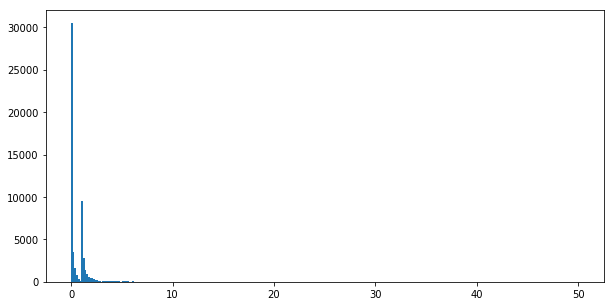

In [18]:
fig = plt.figure(figsize=(10,5))
plt.hist(y, bins=300, range=[0, 50])

In [19]:
y

0     0.000000
1     0.001133
2     0.000000
3     0.000000
4     0.000000
5     0.001667
6     0.000000
7     0.180000
8     0.000000
9     0.000000
10    0.011600
11    0.000000
12    0.000000
13    0.000000
14    0.000000
0     0.003033
1     0.000044
2     0.000000
3     0.000000
4     0.000000
5     0.030000
6     0.003500
7     0.138889
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.018190
14    0.000714
        ...   
12    2.225743
13    0.020000
14    1.051467
0     0.000015
1     2.454286
2     1.210769
3     1.242778
4     1.038333
5     0.084000
6     0.332000
7     0.686957
8     0.000600
9     0.086667
10    0.107000
11    1.069125
12    0.095000
13    1.073375
14    2.560800
0     0.099000
1     0.002100
2     0.017667
3     1.016667
4     1.128125
5     0.151050
6     0.115000
7     0.271429
8     0.071667
9     1.275000
0     0.149781
1     0.001250
Name: funding_percent, Length: 55808, dtype: float64